## MACD (Moving Average Convergance Divergance)
This is an extension to moving average and is used to explians trends.
### Strategy
When Fast signal line has crossed over MACD line it shows Bullish behaviour in the market and Bearish for Fast signal line crosses below MACD line.

In [6]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

C:\Users\devpa\AppData\Local\Temp\ipykernel_37464\656485144.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=TICKER, period='max')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,12_ema,26_ema,MACD,Signal,MACD_hist,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,,,,
2025-02-27,581.575989,594.469005,581.178400,593.305909,74196700,581.575989,581.575989,0.000000,0.000000,0.000000,NaN,NaN,NaN
2025-02-28,590.651794,591.188566,578.981515,582.082984,88744100,586.492050,586.288426,0.203624,0.113124,0.090499,-1.0,0.015606,-0.015606
2025-03-03,580.303650,593.793080,576.456634,592.639934,74249200,584.076716,584.138154,-0.061438,0.041582,-0.103020,1.0,-0.002188,-0.032852
2025-03-04,573.434631,581.914010,568.852020,576.267745,109648200,580.717426,581.145917,-0.428491,-0.117657,-0.310835,-1.0,-0.013999,-0.021404
2025-03-05,579.597839,581.407040,569.677119,573.265669,71230500,580.413238,580.786911,-0.373673,-0.193816,-0.179857,-1.0,-0.003401,-0.031922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-16,624.219971,624.729980,618.049988,623.739990,88987500,620.440854,611.840965,8.599889,9.113307,-0.513418,-1.0,0.073325,0.022952
2025-07-17,628.039978,628.400024,624.179993,624.400024,68885700,621.609950,613.041579,8.568371,9.004319,-0.435949,-1.0,0.079893,0.016692
2025-07-18,627.580017,629.469971,626.460022,629.299988,65621600,622.528422,614.119072,8.409350,8.885326,-0.475976,-1.0,0.079102,0.017436


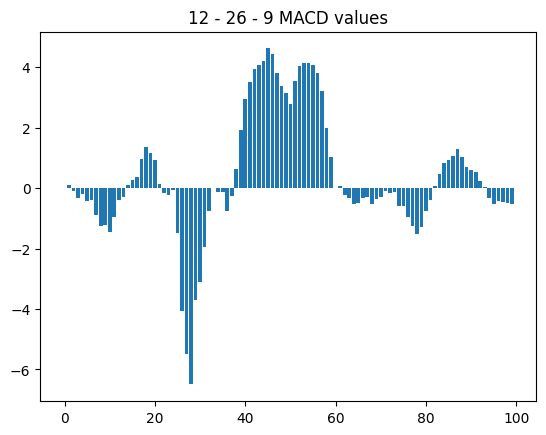

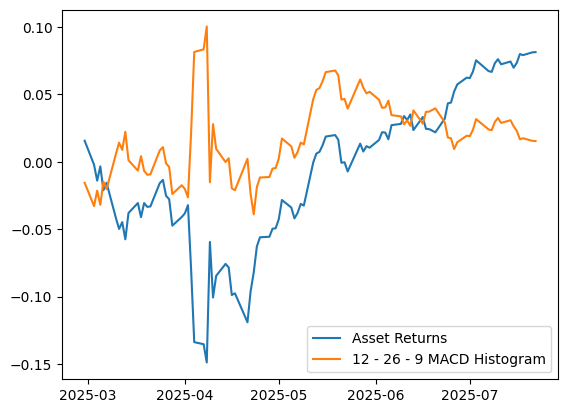

In [106]:
"""
fast_ema is more adaptive to newer trends
slow_ema is more stable
signal_ema/span is the signal for bullish or bearish crossover trend
"""
TICKER = 'SPY'
WINDOW = 200
MACD_FAST = 12
MACD_SLOW = 26
MACD_SPAN = 9
LOOKBACK = 100

def get_data(ticker=TICKER):
    df = yf.download(tickers=TICKER, period='max')
    # flattening the df to avoid tuple based column name ex("Close", "SPY")
    df.columns = df.columns.get_level_values(0)
    # looking at the interested subset of data
    return df.iloc[-LOOKBACK:, :]

"""
moving avg are also called as exponential moving average
ewn is used for exponentailly weighted i.e more weight to recent values
it has fast reaction to new data hence adapting fast towards trends
less lag as do not have as not much backward looking and also has exponential smooting
"""
def add_MACD(df, fast=MACD_FAST, slow=MACD_SLOW, span=MACD_SPAN):
    df[f"{fast}_ema"] = df["Close"].ewm(span=fast).mean()
    df[f"{slow}_ema"] = df["Close"].ewm(span=slow).mean()

    # macd line is the difference between the slow and fast
    df["MACD"] = df[f"{fast}_ema"] - df[f"{slow}_ema"]

    # macd signal is a 9-period moving average of the line
    df["Signal"] = df["MACD"].ewm(span=span).mean()

    # MACD histogram as positive crossover is strong signal to exit for negative crossover
    df['MACD_hist'] = df['MACD'] - df['Signal']
    plt.title(f'{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD values')
    plt.bar(x= range(len(df)), height=df['MACD_hist'])
    return df

"""
Our strategy here is to go long when MACD_hist > 0 else we short
"""
def add_strategy(df):
    df["Strategy"] = 0
    df["Strategy"] = np.where(df["MACD_hist"] > 0, 1, -1)
    df["Strategy"] = df["Strategy"].shift(1)
    return df

def test_strategy(df):
    df["Asset_Returns"] = np.cumprod(1 + df["Close"].pct_change()) - 1
    df["Strategy_Returns"] = np.cumprod(1 + df["Close"].pct_change() * df["Strategy"]) - 1
    plt.figure()
    plt.plot(df["Asset_Returns"], label="Asset Returns")
    plt.plot(df["Strategy_Returns"], label=f"{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Histogram")
    plt.legend()
    return df
def main():
    df = get_data()
    df = add_MACD(df)
    df = add_strategy(df)
    df = test_strategy(df)
    return df

df = main()
df

As indicative of the above chart it can be noted that it does beat the regular returns but need to modify and depends highly on MACD_SIGNAL, MACD_FAST, MACD_SLOW and LOOKBACK.

Need to observe relationships between the number of LOOKBACK days to find critical relations in the returns graph.

When used on a standalone basis in long term it reliability issues but can help in short term.

MACD is a powerful tool to backtest on the TICKER but it does not work on standalone basis properly.